In [ ]:
import numpy as np
from scipy.io.wavfile import read
from scipy import signal, arange
from scipy.signal import hilbert, find_peaks_cwt
import matplotlib.pyplot as plt
import matplotlib.axes as matax
import matplotlib.mlab as mlab
import sys
from math import exp
import operator

In [ ]:
def dirDist(x, auvDepth=auvDepth, oceanDepth=oceanDepth):
    return np.sqrt(x**2 + (oceanDepth - auvDepth) ** 2)

In [ ]:
def refDist(x, auvDepth=auvDepth, oceanDepth=oceanDepth):
    return np.sqrt(oceanDepth**2  + ref1helper(x)**2) + np.sqrt(auvDepth**2 + (x-ref1helper(x))**2)

In [ ]:
def ref1helper(x, auvDepth=auvDepth, oceanDepth=oceanDepth):
    return oceanDepth*x/(oceanDepth + auvDepth)

In [ ]:
def ref2Dist(x, auvDepth=auvDepth, oceanDepth=oceanDepth):
    return 2 * np.sqrt(oceanDepth**2 + ref2helper(x)**2) + np.sqrt((oceanDepth-auvDepth)**2 + (x-2*ref2helper(x))**2)

In [ ]:
def ref2helper(x, auvDepth=auvDepth, oceanDepth=oceanDepth):
    return oceanDepth*x/(3*oceanDepth-auvDepth)

In [ ]:
def firTimeDist(x, auvDepth=auvDepth, oceanDepth=oceanDepth):
    return refDist(x, auvDepth, oceanDepth) - dirDist(x, auvDepth, oceanDepth)

In [ ]:
def secTimeDist(x, auvDepth=auvDepth, oceanDepth=oceanDepth):
    return ref2Dist(x, auvDepth, oceanDepth) - dirDist(x, auvDepth, oceanDepth)

In [ ]:
oceanDepth = 50
auvDepth = 20

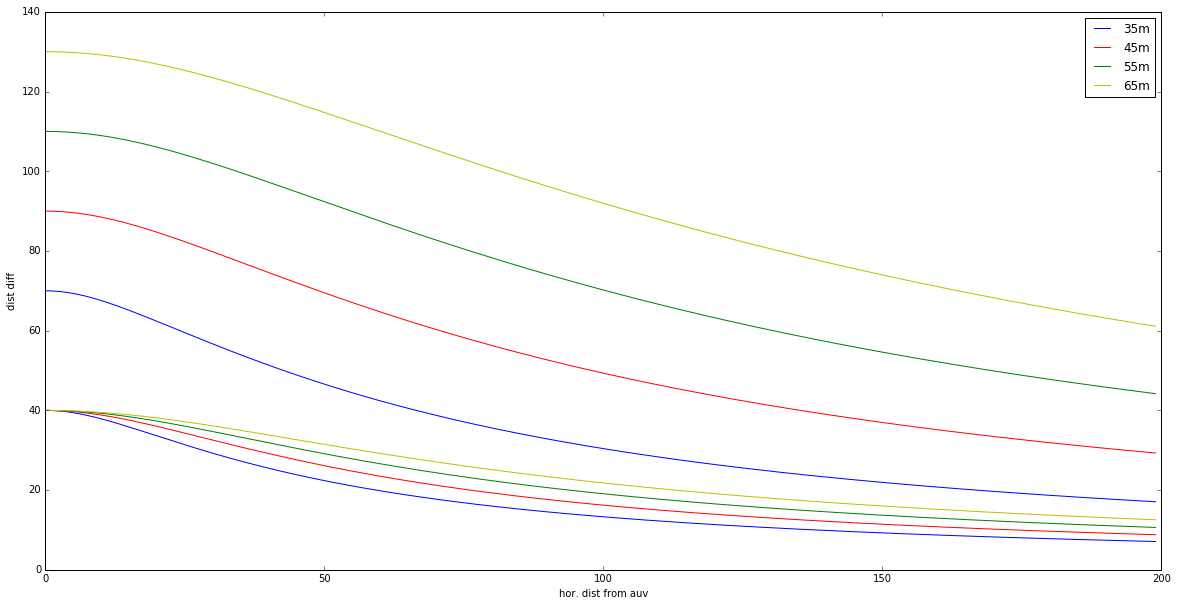

In [148]:
firstArrival = []
secondArrival = []
xdist = 200
plt.figure(figsize=(20,10))
color = ["b", "r", "g", "y"]
index=0
for j in range(35, 75, 10):
    for i in range(xdist):
        firstArrival.append(firTimeDist(i, 20, j));
        secondArrival.append(secTimeDist(i, 20, j));
    plt.plot(arange(xdist), firstArrival, c=color[index%4]);
    plt.plot(arange(xdist), secondArrival, label=str(j)+"m", c=color[index%4]);
    firstArrival = []
    secondArrival = []
    index = index+1;

plt.legend()
plt.xlabel("hor. dist from auv");
plt.ylabel("dist diff");
plt.show();
